In [1]:
import os.path
from scipy import *
from scipy import integrate as integrate
import numpy as np
from numpy import *
from numpy import linalg as LA
from scipy import linalg as LA2
import sympy as sympy
import sys as sys
import time
import matplotlib.pyplot as plt
import itertools as it
from IPython.core.display import HTML
import BasicTools as BT
import WaveTools as WT
import PlotTools as PT
import FFTTools as FFTT
import OperatorTools as OT
import GridTransferTools as GTT

display(HTML("<style>pre { white-space: pre !important; }</style>"))
np.set_printoptions( linewidth = 1000)

In [2]:
def Gauss(omega, sigma, mu, cellAve = True):
    xCell = omega.xCell
    nh = omega.nh[::-1][0]
    if (cellAve):
        x = np.linspace(0., 1., num = (4 * nh) + 1)
    else:
        x = xCell
    gauss = np.exp(-((x - mu)**2) / (2. * (sigma**2)))
    if (cellAve):
        gauss = BoolesAve(gauss)
    return gauss

In [3]:
def FourierCoefs(omega, waves, waveform):
    errorLoc = 'ERROR:\nFFTTools:\nFourierCoefs:\n'
    nh = omega.nh[::-1][0]
    degFreed = omega.degFreed[::-1][0]
    errorMess = BT.CheckSize(nh, waves[0, :], nName = 'nh', matricaName = 'waves')
    if (errorMess != ''):
        sys.exit(errorLoc + errorMess)
    errorMess = BT.CheckSize(degFreed, waves[:, 0], nName = 'degFreed', matricaName = 'waves')
    if (errorMess != ''):
        sys.exit(errorLoc + errorMess)
    errorMess = BT.CheckSize(degFreed, waveform, nName = 'degFreed', matricaName = 'waveform')
    if (errorMess != ''):
        sys.exit(errorLoc + errorMess)
    norm = LA.inv(waves.transpose() @ waves)
    FCoefs = waveform.transpose() @ waves @ norm
    return FCoefs

In [4]:
def BoolesAve(f):
    errorLoc = 'ERROR:\nTestTools:\nBoolesAve:\n'
    if (len(f) % 4 != 1):
        sys.exit(errorLoc + 'f must be one more than integer multiple of four in length!')
    f_ave = (1. / 90.) * ((7 * f[:-1:4]) + (32 * f[1::4]) + (12 * f[2::4]) + (32 * f[3::4]) + (7 * f[4::4]))
    return f_ave

In [5]:
def PropogateFCoefs(omega, FCoefs, c, t):
    errorLoc = 'ERROR:\nFFTTools:\nPropogateFCoefs:\n'
    nh = omega.nh[::-1][0]
    degFreed = omega.degFreed[::-1][0]
    errorMess = BT.CheckSize(degFreed, FCoefs, nName = 'degFreed', matricaName = 'FCoefs')
    if (errorMess != ''):
        sys.exit(errorLoc + errorMess)
    Cosine = lambda k: np.cos(2. * np.pi * k * c * t)
    Sine = lambda k: np.sin(2. * np.pi * k * c * t)
    RotMat = lambda k: np.asarray([Cosine(k), Sine(k), -Sine(k), Cosine(k)]).reshape(2, 2)
    rotMats = [RotMat(k) for k in range(int(nh / 2) + 1)]
    shift = LA2.block_diag(*rotMats)[1:-1, 1:-1]
    shift[0, 0] = Cosine(0)
    shift[::-1, ::-1][0, 0] = Sine(nh / 2)
    propFCoefs = shift @ FCoefs
    return propFCoefs

In [6]:
omega = BT.Grid(64)
waves = WT.MakeWaves(omega)

In [7]:
sigma = 0.1
mu = 0.5
gauss = Gauss(omega, sigma, mu)

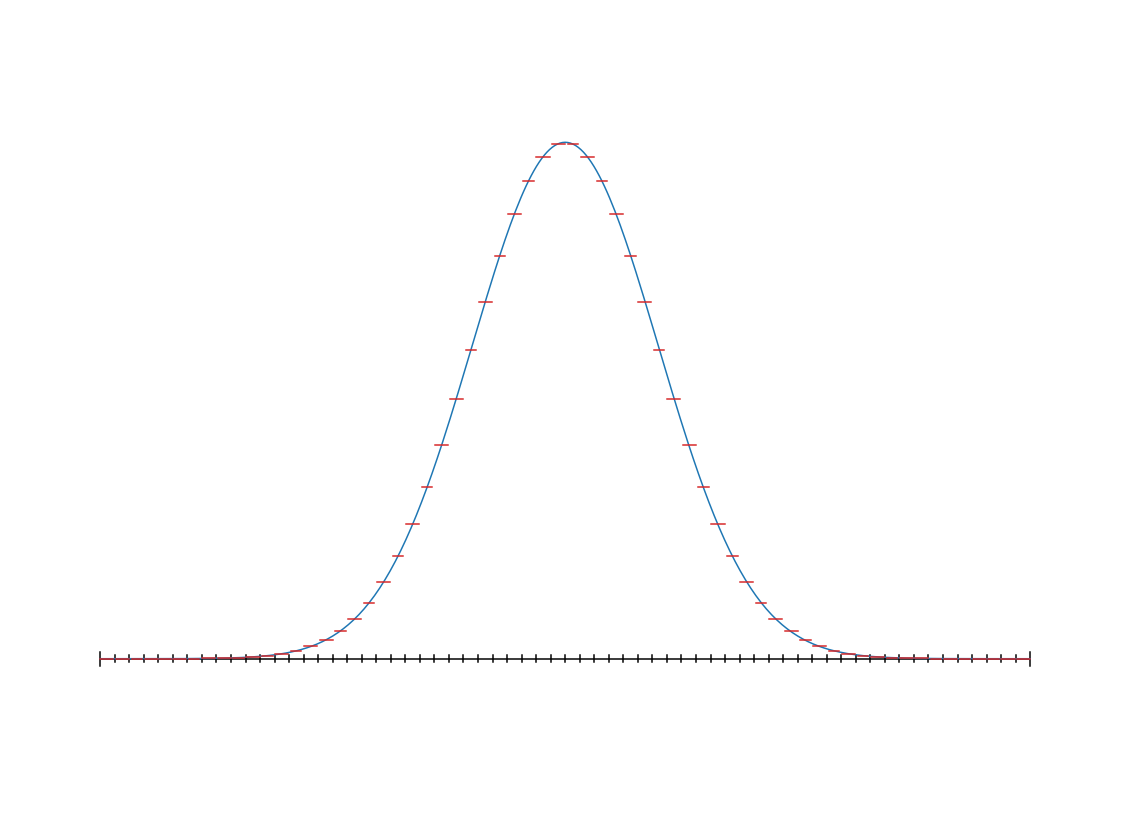

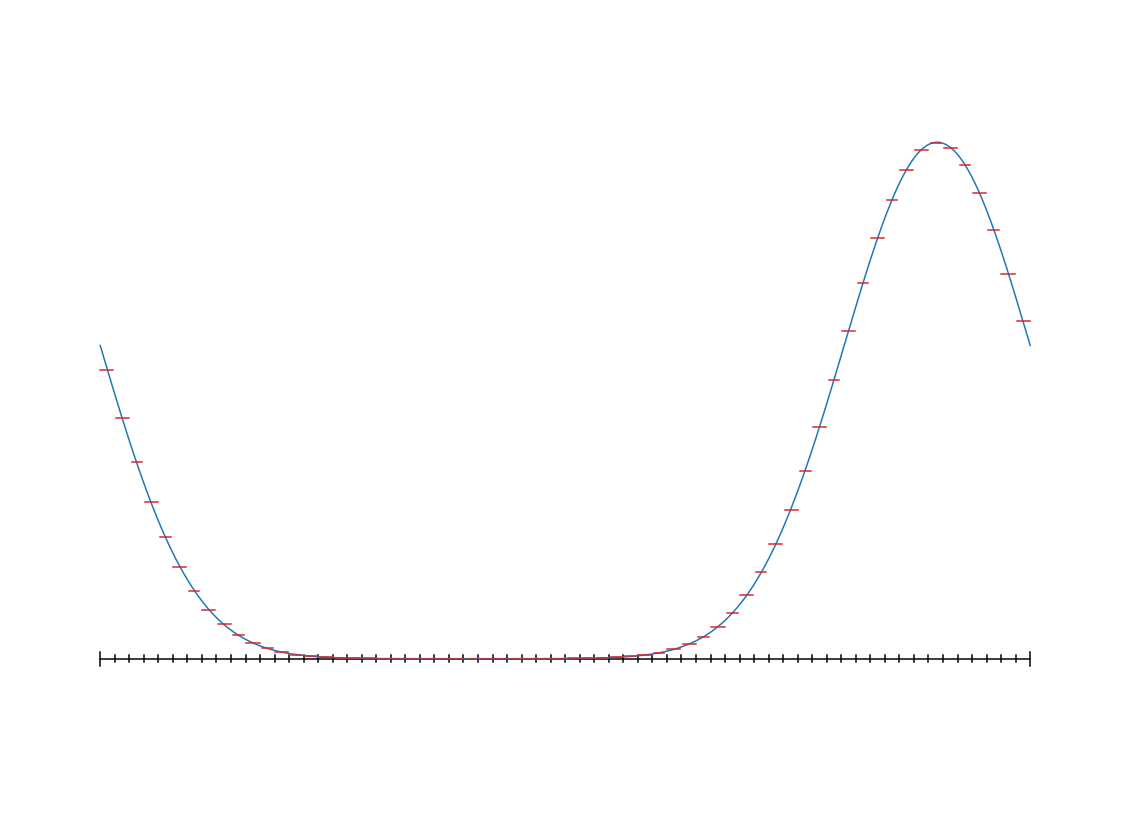

In [8]:
FCoefs = FourierCoefs(omega, waves, gauss)
PT.PlotMixedWave(omega, waves, FCoefs, rescale = [4, 6])
c = 1.
t = 0.4
propFCoefs = PropogateFCoefs(omega, FCoefs, c, t)
PT.PlotMixedWave(omega, waves, propFCoefs, rescale = [4, 6])

In [9]:
# A = np.arange(64).reshape(8, 8)
# B = np.ones((8, 8), float)
C = np.arange(17)
# D = (C * B.transpose()).transpose()
print(C)
print('')
print(C[:-1:2], C[:-1])
print('')
print(C[1::2])
print('')
print(C[2::2])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]

[ 0  2  4  6  8 10 12 14] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

[ 1  3  5  7  9 11 13 15]

[ 2  4  6  8 10 12 14 16]


In [10]:
C = np.arange(17)
# D = (C * B.transpose()).transpose()
print(C)
print('')
print(C[:-1:4])
print('')
print(C[1::4])
print('')
print(C[2::4])
print('')
print(C[3::4])
print('')
print(C[4::4])
print(len(C))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]

[ 0  4  8 12]

[ 1  5  9 13]

[ 2  6 10 14]

[ 3  7 11 15]

[ 4  8 12 16]
17
